# Overview
The Goal of this Notebook is to get transcripts from Youtube Videos of British MPs and Parties. Therefore, I first create a table with all the channels that feature British MP's and their statistics. Afterwards, I will create a list of videos which feature on the most prominent and professional of those channels and get the Transcripts for some of those videos.

In [ ]:
# standard packages
import pandas as pd
import numpy as np


# randomization
general_seed = 1984

# API handling
import requests
youtube_api_key_1 = #insert key
youtube_api_key_2 = #insert key
!pip install youtube_transcript_api
from youtube_transcript_api import YouTubeTranscriptApi # get transcripts

# Visualisation
import seaborn as sn
import matplotlib.pyplot as plt

from google.colab import data_table
data_table.enable_dataframe_formatter()
from google.colab import files # for download

In [ ]:
list_of_mps = pd.read_csv('https://www.theyworkforyou.com/mps/?f=csv')
list_of_mps.head()

,Person ID,First name,Last name,Party,Constituency,URI
0,10001,Diane,Abbott,Independent,Hackney North and Stoke Newington,https://www.theyworkforyou.com/mp/10001/diane_...
1,25034,Debbie,Abrahams,Labour,Oldham East and Saddleworth,https://www.theyworkforyou.com/mp/25034/debbie...
2,25661,Bim,Afolami,Conservative,Hitchin and Harpenden,https://www.theyworkforyou.com/mp/25661/bim_af...
3,11929,Adam,Afriyie,Conservative,Windsor,https://www.theyworkforyou.com/mp/11929/adam_a...
4,25817,Nickie,Aiken,Conservative,Cities of London and Westminster,https://www.theyworkforyou.com/mp/25817/nickie...


In [ ]:
list_of_mps.shape

(650, 6)

# A Dataset of Youtube Channels Featuring British MPS

## Getting Channels through Youtube API Data Search

Google only let me take 100 requests a day. Therefore, I've run the following code on multiple days successively.
At first, I need to import the results fromm the previous runs.

In [ ]:
# import previous runs
possible_channels = pd.read_csv('possible_channels.csv', sep = ";")
#del(possible_channels['Unnamed: 0']) sometimes I forgot to delete the index
possible_channels.head()

,First_Name,Last_Name,Channel_Name,Channel_ID,Match,Correct
0,Diane,Abbott,Diane Abbott's Office,UC7Di51c1PpQ2iJ_XKrvfDZg,True,Yes
1,Diane,Abbott,Diane Abbott MP,UCbaRV3GOpoIRtM0dW4wgkvw,True,No
2,Diane,Abbott,Diane Abbott,UCptHPVUzDQMREhC5R2eTZkw,True,No
3,Debbie,Abrahams,Debbie Abrahams,UCSaWMMLlOHOufy0eJD5uTiw,True,Yes
4,Debbie,Abrahams,Compassion in Politics,UCYiDVhtwheT9Azibd-Bk78g,False,No


And then get the last politician from the previous runs, to now continue with the next one.

In [ ]:
# last politician from the previous run
last_politician = list_of_mps.loc[
    (list_of_mps['First name'] == possible_channels['First_Name'].iloc[-1]) &
    (list_of_mps['Last name'] == possible_channels['Last_Name'].iloc[-1])
  ]
last_politician

,Person ID,First name,Last name,Party,Constituency,URI
610,24814,Martin,Vickers,Conservative,Cleethorpes,https://www.theyworkforyou.com/mp/24814/martin...


In [ ]:
# url from a tool on youtube API help page
url_1 = 'https://youtube.googleapis.com/youtube/v3/search?'
#create dictionary
channels_dict = {'First_Name':[], 'Last_Name': [],'Channel_Name':[], 'Channel_ID': [] }

In [ ]:
# create dictionary
for mp in range(last_politician.index[0] + 1, # start with the first not previously requested politican
                len(list_of_mps)): # until you searched all politicians
  # Get Name of MP
  first_name = list_of_mps.loc[mp, 'First name']
  last_name = list_of_mps.loc[mp, 'Last name']

  # Get possible channels
  url = f'{url_1}part=snippet&q={first_name}%20{last_name}%20mp&type=channel&key={youtube_api_key_2}'
  r = requests.get(url)
  print(r)
  if r.status_code == 403: # once google tells me, i exceeded the limit it stops
    break

  # Enter channels into dictionary
  result = r.json()
  try:
      for i in range(0,min(3, result['pageInfo']['resultsPerPage'])):
        channels_dict['First_Name'].append(first_name)
        channels_dict['Last_Name'].append(last_name)
        channels_dict['Channel_Name'].append(result['items'][i]['snippet']['title'])
        channels_dict['Channel_ID'].append(result['items'][i]['snippet']['channelId'])
  except:
      print(first_name + ' ' + last_name)
      print(i)

<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>


In [ ]:
new_possible_channels = pd.DataFrame(channels_dict)
possible_channels = pd.concat([possible_channels, new_possible_channels], axis = 0)
possible_channels.to_csv('possible_channels.csv')
possible_channels.tail()

,First_Name,Last_Name,Channel_Name,Channel_ID,Match,Correct
106,Nadhim,Zahawi,Rt Hon Nadhim Zahawi MP,UCC_V8Wcj0VgEZaLJWbfWrxA,NaN,NaN
107,Nadhim,Zahawi,Illustraful,UCkQacsHQt0Hm0z038opQGng,NaN,NaN
108,Daniel,Zeichner,Daniel Zeichner,UCYFVheQthRjt_j-6XXB0XgA,NaN,NaN
109,Daniel,Zeichner,CAMS Music Trust,UCzjqFPWneaCpWO9ybaRUcMA,NaN,NaN
110,Daniel,Zeichner,CamTabTV,UCMzBOY5qJojO-OEmDYYJwRg,NaN,NaN


In [ ]:
len(possible_channels)

1796

I add the other information from the original dataframe.

In [ ]:
possible_channels = pd.merge(
                    left = list_of_mps,
                    right = possible_channels,
                    left_on = ["First name", "Last name"],
                    right_on = ["First_Name", "Last_Name"],
                    how='left'
                    )

Apparently some searches where without results

In [ ]:
len(possible_channels[possible_channels['Channel_ID'].isna()])

26

In [ ]:
possible_channels[possible_channels['Channel_ID'].isna()].head()

,Person ID,First name,Last name,Party,Constituency,URI,First_Name,Last_Name,Channel_Name,Channel_ID,Match,Correct
98,25726,Órfhlaith,Begley,Sinn Féin,West Tyrone,https://www.theyworkforyou.com/mp/25726/orfhla...,NaN,NaN,NaN,<NA>,NaN,NaN
259,25414,James,Cartlidge,Conservative,South Suffolk,https://www.theyworkforyou.com/mp/25414/james_...,NaN,NaN,NaN,<NA>,NaN,NaN
263,25897,Miriam,Cates,Conservative,Penistone and Stocksbridge,https://www.theyworkforyou.com/mp/25897/miriam...,NaN,NaN,NaN,<NA>,NaN,NaN
264,25397,Maria,Caulfield,Conservative,Lewes,https://www.theyworkforyou.com/mp/25397/maria_...,NaN,NaN,NaN,<NA>,NaN,NaN
265,25340,Alex,Chalk,Conservative,Cheltenham,https://www.theyworkforyou.com/mp/25340/alex_c...,NaN,NaN,NaN,<NA>,NaN,NaN


## Identifying channels that actually match the MP and identifying the best fitting for each MP

I got 1796 channels for 650 MPs. Partly the names Match, partly they do not. I looked at some channels, and I can not definetely say which is official and which not. Therefore, I will use a two tiered process to get to maximum one channel per MP.
At first, I automatically annotatet all channels whether first and second name of the MP are in the channel name. If not, I will not further regard the channel.
Second, If there are multiple channels for one MP who match, I will manually judge which most likely is a relevant or official channel. I do so on grounds of Description, and Number of Followers.

In [ ]:
# i deleted channels with NA as channel name, because they lead to an error
print(len(possible_channels))
possible_channels = possible_channels[~ possible_channels['Channel_Name'].isna()]

1907


In [ ]:
# Math if First Name and Last Name are in the Channel Name
possible_channels.loc[:,'Match'] = possible_channels.apply(
    lambda x: x['First_Name'] in x['Channel_Name'] and
    x['Last_Name'] in x['Channel_Name']
    , axis = 1)

In [ ]:
possible_channels.tail()

,First_Name,Last_Name,Channel_Name,Channel_ID,Match,Correct
1902,Nadhim,Zahawi,Rt Hon Nadhim Zahawi MP,UCC_V8Wcj0VgEZaLJWbfWrxA,True,Yes
1903,Nadhim,Zahawi,Illustraful,UCkQacsHQt0Hm0z038opQGng,False,No
1904,Daniel,Zeichner,Daniel Zeichner,UCYFVheQthRjt_j-6XXB0XgA,True,Yes
1905,Daniel,Zeichner,CAMS Music Trust,UCzjqFPWneaCpWO9ybaRUcMA,False,No
1906,Daniel,Zeichner,CamTabTV,UCMzBOY5qJojO-OEmDYYJwRg,False,No


In [ ]:
possible_channels.to_csv('possible_channels.csv')

I manually investigated when there are two possible channels for one MP, checked wether they both belong to the MP and of those who belong to the MP took the most prominent one. The following code snippets import the manually checked file and tests whether there are any duplicates.

In [ ]:
possible_channels = pd.read_csv('possible_channels.csv', sep = ";")

In [ ]:
# Check whether each MP has just one Yes value
test = possible_channels[possible_channels['Correct'] == 'Yes'].duplicated(['First_Name', 'Last_Name'])
possible_channels[possible_channels['Correct'] == 'Yes'][test]

,First_Name,Last_Name,Channel_Name,Channel_ID,Match,Correct


## Get Statistics to all channels

I can not get all the videos of all channels. I will just download scripts for channels which actually are viewed (have a high subscriber count) and are somehow professional (have high number of videos). I need to download those statistics first.

In [ ]:
id_nr = 0
results = []
while id_nr < len(possible_channels): # while, because 50 ID's at a time
  print(f'Batch starts with Channel Nr. {id_nr}')
  # Create URL
    # I got the URL format from https://developers.google.com/youtube/v3/docs/channels/lis
    # Where is used 'Try this Method' and then looked at the HTML code
  base_url = 'https://youtube.googleapis.com/youtube/v3/channels?part=statistics'

  # I itteratively add 50 channel ids to the base_url
  for i in range(
      id_nr, min(
          id_nr + 50, # i can get the statistics for maximal 50 id's a time
          len(possible_channels) # the last batch is less than 50 id's
          )
      ):
    base_url += f"&id={possible_channels.loc[i, 'Channel_ID']}"

  base_url += f'&maxResults=50&key={youtube_api_key_2}'

  # Request and Append Data
  r = requests.get(base_url)
  print(r)
  if r.status_code == 403: # once google tells me that i exceeded the limit, it stops
    break
  result = r.json()
  results.append(result)

  # Increase Index
  id_nr = id_nr + 50

Batch starts with Channel Nr. 0
<Response [200]>
Batch starts with Channel Nr. 50
<Response [200]>
Batch starts with Channel Nr. 100
<Response [200]>
Batch starts with Channel Nr. 150
<Response [200]>
Batch starts with Channel Nr. 200
<Response [200]>
Batch starts with Channel Nr. 250
<Response [200]>
Batch starts with Channel Nr. 300
<Response [200]>
Batch starts with Channel Nr. 350
<Response [200]>
Batch starts with Channel Nr. 400
<Response [200]>
Batch starts with Channel Nr. 450
<Response [200]>
Batch starts with Channel Nr. 500
<Response [200]>
Batch starts with Channel Nr. 550
<Response [200]>
Batch starts with Channel Nr. 600
<Response [200]>
Batch starts with Channel Nr. 650
<Response [200]>
Batch starts with Channel Nr. 700
<Response [200]>
Batch starts with Channel Nr. 750
<Response [200]>
Batch starts with Channel Nr. 800
<Response [200]>
Batch starts with Channel Nr. 850
<Response [200]>
Batch starts with Channel Nr. 900
<Response [200]>
Batch starts with Channel Nr. 950


In [ ]:
# Save
with open('channel_statistics.txt', 'w') as f:
    for batch in results:
        f.write(f"{batch}\n")

Checking whether everything worked

In [ ]:
amount_results = 0
for i in range(0, len(results)):
  amount_results += len(results[i]['items'])

print(f"I found {len(possible_channels)} possible channels and for {amount_results} I found statistics. \nTherefore, some are misssing. \nWe will see which later.")

I found 1796 possible channels and for 1784 I found statistics. 
Therefore, some are misssing. 
We will see which later.


Create a Pandas Dataframe out of the Dictionaries which I got. I use json_normalize for this. Because I just appended each request and in each request there are multiple items, I iteratively append each dictionary to the Data Frame and only use the information in the key \['items'].

In [ ]:
channel_statistics = pd.json_normalize(results[0]['items'])
for i in range(1,len(results)):
  channel_statistics = pd.concat([channel_statistics, pd.json_normalize(results[i]['items'])])

print(len(channel_statistics))

1784


In [ ]:
channel_statistics = channel_statistics[['id',
                                         "statistics.viewCount",
                                         'statistics.subscriberCount',
                                         'statistics.videoCount']]
channel_statistics.columns = ['Channel_ID',
                                         "viewCount",
                                         'subscriberCount',
                                         'videoCount']

In [ ]:
channel_statistics.head()

,Channel_ID,viewCount,subscriberCount,videoCount
0,UCFLxVZeiVNpt0SLnc2jxj0w,13979,61,579
1,UCoVTHseWnes7IBF1D-ZZh0w,28921,116,252
2,UCLcqW-ERtd_goU5Y04upA7w,2587,34,40
3,UC24POZS43dF5CR2sSgWjbXA,5237,12,48
4,UCfuNyivCQaJ6K4P0bCwU5vQ,2081,13,10


In [ ]:
channel_statistics['Channel_ID'] = channel_statistics['Channel_ID'].astype('string')
channel_statistics['viewCount'] = channel_statistics['viewCount'].astype('int')
channel_statistics['subscriberCount'] = channel_statistics['subscriberCount'].astype('int')
channel_statistics['videoCount'] = channel_statistics['videoCount'].astype('int')

I noticed, there are some duplicates in the channel. This might be because some channels appeared more than once in the searches

In [ ]:
sum(channel_statistics.duplicated())

214

I delete those duplicates.

In [ ]:
channel_statistics = channel_statistics[~channel_statistics.duplicated(keep = 'first')]

### Join

In [ ]:
possible_channels.loc[:,'Channel_ID'] = possible_channels['Channel_ID'].astype('string')
channels = pd.merge(left = possible_channels,
                    right = channel_statistics,
                    on = "Channel_ID",
                    how='left',
                    copy = False)
channels.to_csv('channels.csv')
len(channels)

1817

Comming back to the different lenght of channel statistics and possible channels. Why is that?

Are certain channels missing?

In [ ]:
sum(channels['viewCount'].isnull())

0

No. Are certain channels double?

In [ ]:
sum(channels.duplicated('Channel_ID'))

226

Yes. Are for me relevant channels doubled?

In [ ]:
relevant_channels = channels[(channels['Correct'] == 'Yes') & (~channels['Correct'].isna())]
relevant_duplicates = relevant_channels.duplicated('Channel_ID')
sum(relevant_duplicates)

0

No.

### Statistics

In [ ]:
# Import
channels = pd.read_csv('channels.csv', sep = ';')
relevant_channels = channels[(channels['Correct'] == 'Yes') & (~channels['Correct'].isna())]

#### Amount of Videos

In [ ]:
relevant_channels.sort_values('videoCount', ascending = False).head()

,Person ID,First name,Last name,Party,Constituency,URI,First_Name,Last_Name,Channel_Name,Channel_ID,Match,Correct,viewCount,subscriberCount,videoCount
619,10218,George,Galloway,Workers Party,Rochdale,https://www.theyworkforyou.com/mp/10218/george...,George,Galloway,George Galloway MP,UCf_HItERkRB3vnkWt2RSOLg,True,Yes,84431523.0,428000.0,5435.0
950,25297,Stephen,Kinnock,Labour,Aberavon,https://www.theyworkforyou.com/mp/25297/stephe...,Stephen,Kinnock,Stephen Kinnock,UC58vCicN9vLoEftSrO7Hc-g,True,Yes,135568.0,323.0,786.0
634,25300,Patricia,Gibson,Scottish National Party,North Ayrshire and Arran,https://www.theyworkforyou.com/mp/25300/patric...,Patricia,Gibson,Patricia Gibson MP,UCXs-hHBNQlRWl2OPGcU3vpw,True,Yes,251273.0,474.0,744.0
1533,24802,Henry,Smith,Conservative,Crawley,https://www.theyworkforyou.com/mp/24802/henry_...,Henry,Smith,HenrySmithMP,UCOAV_oISxvneSg8ZnXtFw7A,True,Yes,128372.0,336.0,690.0
1369,25690,Luke,Pollard,Labour/Co-operative,"Plymouth, Sutton and Devonport",https://www.theyworkforyou.com/mp/25690/luke_p...,Luke,Pollard,Luke Pollard,UCp_SXoQ04ATIktIi6LjyycA,True,Yes,59335.0,250.0,648.0


One person has so many videos that all others can not be differentiated. Therefore, I mask it in the visualisation.

The Visualisation shows that only few accounts have more than 10 videos and most of them are Conservative. Therefore, in general, the accounts appear to not so actively managed.

In [ ]:
# Colours according to https://docs.google.com/spreadsheets/d/161Df7tQFZrKhVPAy4vCT19RoDXl2dAsqOWRdOkNInp4/edit#gid=0
palette = {"Alba":"grey",
"Conservative": "#0087dc",
"DUP":"grey",
"Independent":"grey",
"Labour":"#d50000" ,
"Labour/Co-operative" :"#d50000"   ,
"Liberal Democrat" :"#FDBB30"  ,
"Plaid Cymru" :"grey",
"Reclaim"  :"grey",
"Reform UK"  :"grey",
"Scottish National Party":"#FFF95D",
"Social Democratic and Labour Party" :"#d50000"  ,
"Speaker"  :"grey",
"Workers Party" :"grey",  }

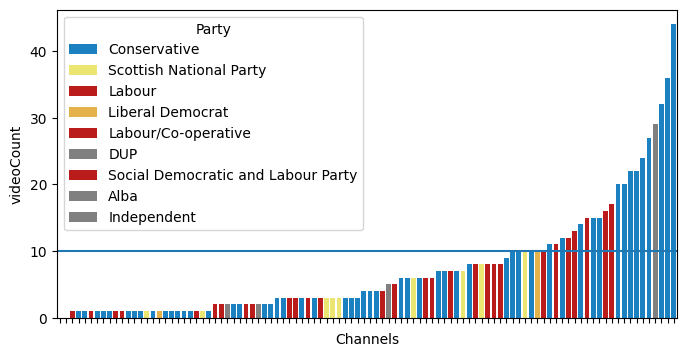

In [ ]:
df = relevant_channels[relevant_channels['viewCount'] < 1000]
plt.figure(figsize=(8, 4)) # https://stackoverflow.com/a/638443
g = sn.barplot(df, x = 'Channel_Name', y = 'videoCount',
               hue = 'Party', palette = palette, #https://stackoverflow.com/a/46174007
              order=df.sort_values('videoCount').Channel_Name)
          # https://www.geeksforgeeks.org/seaborn-sort-bars-in-barplot/
g.set(xticklabels=[]) #https://stackoverflow.com/a/58476779
g.set_xlabel('Channels')
plt.axhline(y=10)

#### Followers

In case of the subscribers, we see that three MP's have many more subscribers than the rest: Rishi Sunak, Geroge Galloway and Andre Bridgen.

In [ ]:
relevant_channels.sort_values('subscriberCount', ascending = False).head()

,Person ID,First name,Last name,Party,Constituency,URI,First_Name,Last_Name,Channel_Name,Channel_ID,Match,Correct,viewCount,subscriberCount,videoCount
1616,25428,Rishi,Sunak,Conservative,Richmond (Yorks),https://www.theyworkforyou.com/mp/25428/rishi_...,Rishi,Sunak,Rishi Sunak,UCFAdRzdogoJg5ctT8ZALp3g,True,Yes,144016137.0,646000.0,401.0
619,10218,George,Galloway,Workers Party,Rochdale,https://www.theyworkforyou.com/mp/10218/george...,George,Galloway,George Galloway MP,UCf_HItERkRB3vnkWt2RSOLg,True,Yes,84431523.0,428000.0,5435.0
173,24741,Andrew,Bridgen,Reclaim,North West Leicestershire,https://www.theyworkforyou.com/mp/24741/andrew...,Andrew,Bridgen,Andrew Bridgen MP,UCQKK9t6tyakuklNCh-dUT_g,True,Yes,2016732.0,39000.0,168.0
1225,24938,Penny,Mordaunt,Conservative,Portsmouth North,https://www.theyworkforyou.com/mp/24938/penny_...,Penny,Mordaunt,Penny Mordaunt,UC_L1ZWOuD4vMz060OTyMKXQ,True,Yes,1981929.0,7120.0,75.0
1417,24926,Jacob,Rees-Mogg,Conservative,North East Somerset,https://www.theyworkforyou.com/mp/24926/jacob_...,Jacob,Rees-Mogg,Jacob Rees-Mogg,UCBNLxgS02jhM0Et7cM3oB-w,True,Yes,531191.0,4960.0,49.0


Again, I need to mask those outliers, because otherwhise, we can not differentiate between the other accounts. Even without the outliers it is difficult. That is a very beautiful example of the [exponential distribution of online media effects](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9114099/).  

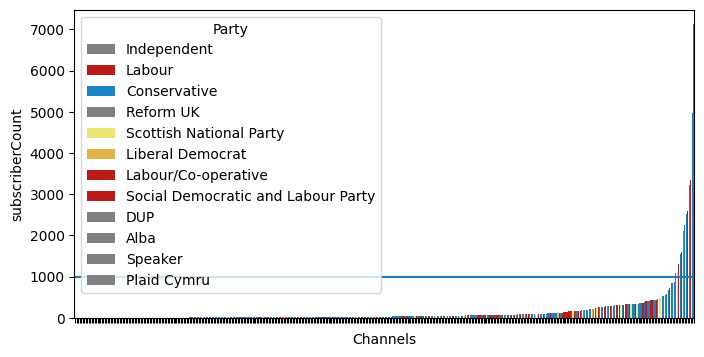

In [ ]:
df = relevant_channels [relevant_channels['subscriberCount'] < 10000]
plt.figure(figsize=(8, 4)) # https://stackoverflow.com/a/638443
g = sn.barplot(df, x = 'Channel_Name', y = 'subscriberCount',
               hue = 'Party', palette = palette, #https://stackoverflow.com/a/46174007
              order=df.sort_values('subscriberCount').Channel_Name)
          # https://www.geeksforgeeks.org/seaborn-sort-bars-in-barplot/
g.set(xticklabels=[]) #https://stackoverflow.com/a/58476779
g.set_xlabel('Channels')
g

plt.axhline(y=1000)

In [ ]:
relevant_channels.loc[:,'log_subscriber_count'] = relevant_channels['subscriberCount'].apply(np.log)

<ipython-input-343-4d82e5c6ef65>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_channels.loc[:,'log_subscriber_count'] = relevant_channels['subscriberCount'].apply(np.log)


Because of this distribution, it might be helpfull to log the follower count, to get better insights.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


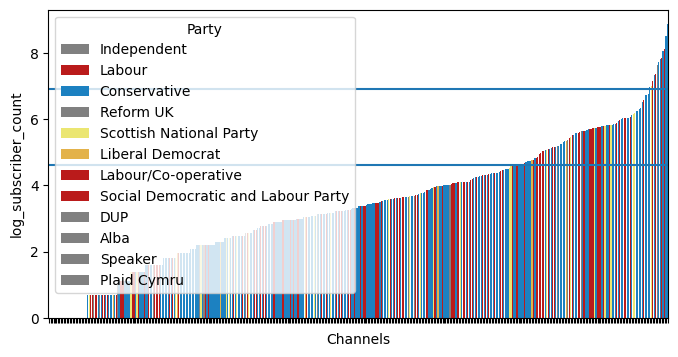

In [ ]:
df = relevant_channels[relevant_channels['subscriberCount'] < 10000]
plt.figure(figsize=(8, 4)) # https://stackoverflow.com/a/638443
g = sn.barplot(df,
               x = 'Channel_Name', y = 'log_subscriber_count',
               hue = 'Party', palette = palette, #https://stackoverflow.com/a/46174007
              order=df.sort_values('subscriberCount').Channel_Name)
          # https://www.geeksforgeeks.org/seaborn-sort-bars-in-barplot/
g.set(xticklabels=[]) #https://stackoverflow.com/a/58476779
g.set_xlabel('Channels')
plt.axhline(y=np.log(100))
plt.axhline(y=np.log(1000))

# Selecting channels

For my project, I will use only channels, which belong to labour or conservative politicians, because they are the largest parties and stand for different politicial sides. Furthermore, I will only use channels with more than 10 videos and more than 100 followers

In [ ]:
party = relevant_channels['Party'].isin(['Labour', 'Labour/Co-operative', "Social Democratic and Labour Party",
                                 "Conservative"])
video = relevant_channels['videoCount'] > 10
subscriber = relevant_channels['subscriberCount'] > 100
selected_channels = relevant_channels[party & video & subscriber]

In [ ]:
print(f"{len(selected_channels)} channels satisfy those conditions.")

84 channels satisfy those conditions.


In [ ]:
labour = sum(selected_channels["Party"] != 'Conservative')
print(f"{labour} of those belong to Labour.")

32 of those belong to Labour.


Because there are only 32 Labour Channels which match the criteria, I will sample 32 Conservative Channels. Furthermore, I will include the channels of the Labour party and the Conservative party in my dataset.

In [ ]:
np.random.seed(general_seed)
labour = selected_channels[selected_channels["Party"] != 'Conservative']
conservative = selected_channels[selected_channels["Party"] == 'Conservative'].sample(32)

In [ ]:
len(conservative)

32

In [ ]:
final_channel_list = pd.concat([labour, conservative], ignore_index=True)
# ChannelIDs from https://www.streamweasels.com/tools/youtube-channel-id-and-user-id-convertor/
#final_channel_list.loc[20] = ['Labour Party', 'UCEBNsfXgUO74N70MJEhJQ1g', 'Labour']
#final_channel_list.loc[21] = ['Conservatives', 'UCXNSyuKeoiHOld1OS3kHuVg', 'Conservative']

In [ ]:
final_channel_list

,Person ID,First name,Last name,Party,Constituency,URI,First_Name,Last_Name,Channel_Name,Channel_ID,Match,Correct,viewCount,subscriberCount,videoCount
0,24958,Rushanara,Ali,Labour,Bethnal Green and Bow,https://www.theyworkforyou.com/mp/24958/rushan...,Rushanara,Ali,Rushanara Ali,UC7iazTIj4W6EGAMs9CJrfJA,True,Yes,195110.0,1600.0,482.0
1,25914,Apsana,Begum,Labour,Poplar and Limehouse,https://www.theyworkforyou.com/mp/25914/apsana...,Apsana,Begum,Apsana Begum,UCMVAWrRK5RczwyOJU0Z98Lg,True,Yes,48654.0,394.0,96.0
2,10669,Hilary,Benn,Labour,Leeds Central,https://www.theyworkforyou.com/mp/10669/hilary...,Hilary,Benn,Hilary Benn,UC__lLAfCtpos4C5dIJTc2Mg,True,Yes,34913.0,154.0,50.0
3,10753,Kevin,Brennan,Labour,Cardiff West,https://www.theyworkforyou.com/mp/10753/kevin_...,Kevin,Brennan,KevinBrennanTV,UCpROmTK0277JQYKMIhoy_rg,True,Yes,244035.0,340.0,423.0
4,25391,Richard,Burgon,Labour,Leeds East,https://www.theyworkforyou.com/mp/25391/richar...,Richard,Burgon,Richard Burgon,UCIlwPOVeNhGurOlT2Ca31Ag,True,Yes,51973.0,333.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,25922,Robbie,Moore,Conservative,Keighley,https://www.theyworkforyou.com/mp/25922/robbie...,Robbie,Moore,Robbie Moore MP,UC2uU5GFpfYjarDjR1UBErmg,True,Yes,102965.0,202.0,99.0
60,24822,Nadhim,Zahawi,Conservative,Stratford-on-Avon,https://www.theyworkforyou.com/mp/24822/nadhim...,Nadhim,Zahawi,Nadhim Zahawi,UC5pmZGgBiKE35V16FBYvytA,True,Yes,30011.0,280.0,11.0
61,25805,Luke,Evans,Conservative,Bosworth,https://www.theyworkforyou.com/mp/25805/luke_e...,Luke,Evans,Dr Luke Evans MP,UCYz54XN7bE6E3hE0GsM0hYg,True,Yes,96250.0,283.0,309.0
62,25645,Bob,Seely,Conservative,Isle of Wight,https://www.theyworkforyou.com/mp/25645/bob_se...,Bob,Seely,Bob Seely MP,UCN1wfVDGZo1BZOHAA4OPENw,True,Yes,98086.0,684.0,342.0


# Get list of videos from each channel

For all channels I will get the last 10 videos, because in this way I can ensure that the video count is balanced. Sometimes the API provides more results than asked for. I delete surplus videos.

In [ ]:
video_list = []
for mp_index in range(0, len(final_channel_list)):

  # Create URL
  first_url = 'https://youtube.googleapis.com/youtube/v3/search?part=snippet'
  channel = f"&channelId={final_channel_list.loc[mp_index,'Channel_ID']}"
  second_url = f'&maxResults=10&type=video&key={youtube_api_key_2}'
  url = first_url + channel + second_url

  # Request data
  r = requests.get(url)
  print(r)
  if r.status_code == 403: # once google tells me, i exceeded the limit it stops
    break

  # Append Data
  result = r.json()
  video_list.append(result)


<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200

I now also get 350 videos from each of the party accounts. Therefore, I need to deal with google pagination. https://developers.google.com/youtube/v3/guides/implementation/pagination

In [ ]:
parties = [['Labour Party', 'UCEBNsfXgUO74N70MJEhJQ1g', 'Labour'],
 ['Conservatives', 'UCXNSyuKeoiHOld1OS3kHuVg', 'Conservative']]

In [ ]:
parties

[['Labour Party', 'UCEBNsfXgUO74N70MJEhJQ1g', 'Labour'],
 ['Conservatives', 'UCXNSyuKeoiHOld1OS3kHuVg', 'Conservative']]

In [ ]:
for party in parties:

  # First Page
  first_url = 'https://youtube.googleapis.com/youtube/v3/search?part=snippet'
  channel = f"&channelId={party[1]}"
  second_url = f'&maxResults=50&type=video&key={youtube_api_key_1}'
  url = first_url + channel + second_url

  # Request data
  r = requests.get(url)
  print(r)

  # Append Data
  result = r.json()
  video_list.append(result)

  # Second Page
  page_token = result['nextPageToken']
  print(page_token)

  for i in range(0,7): # to get 300 further videos:
    first_url = 'https://youtube.googleapis.com/youtube/v3/search?part=snippet'
    channel = f"&channelId={party[1]}"
    second_url = f'&maxResults=50&pageToken={page_token}&type=video&key={youtube_api_key_1}'
    url = first_url + channel + second_url

    # Request data
    r = requests.get(url)
    print(r)

    # Append Data
    result = r.json()
    video_list.append(result)

    # get new token
    page_token = result['nextPageToken']

<Response [200]>
CDIQAA
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
CDIQAA
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>


In [ ]:
channel_videos = pd.json_normalize(video_list[0]['items'])
for i in range(1,len(video_list)):
  channel_videos = pd.concat([channel_videos, pd.json_normalize(video_list[i]['items'])])

print(len(channel_videos))

1390


In [ ]:
channel_videos = channel_videos[['id.videoId',
                'snippet.title',
                'snippet.publishedAt',
                'snippet.channelId',
                'snippet.channelTitle']]
channel_videos.columns = channel_videos.columns.str.split('.').str[1]
channel_videos = channel_videos.reset_index(drop = True)
channel_videos = channel_videos[~ channel_videos.duplicated('videoId', keep = 'first')]
channel_videos = channel_videos.reset_index(drop = True)
channel_videos.to_csv('channel_videos.csv')

Apparently there where some duplicates for the Labour Party.

In [ ]:
channel_videos.groupby('channelTitle')['channelTitle'].count()[channel_videos.groupby('channelTitle')['channelTitle'].count()%10 !=0]

channelTitle
Labour Party    297
Name: channelTitle, dtype: int64

It follows a quick check, whether all channels are actually correct (are the video titles politics related?).

In [ ]:
id = 18 # change number
channel_ids = channel_videos['channelId'].unique()
channel_videos[channel_videos['channelId'] == channel_ids[id]]

,videoId,title,publishedAt,channelId,channelTitle
180,Fr-KZhreajI,Shabana Mahmood MP speaks to BBC Midlands Toda...,2014-08-01T14:11:53Z,UCbsDh5GxX8gA3c5p4Y7ttsQ,Shabana Mahmood MP
181,6auDPTvaAIY,Shabana Mahmood challenges Foreign Secretary B...,2017-01-30T18:31:24Z,UCbsDh5GxX8gA3c5p4Y7ttsQ,Shabana Mahmood MP
182,5GjBO4BRc1o,Shabana Mahmood MP visits Fareshare,2015-11-20T22:15:06Z,UCbsDh5GxX8gA3c5p4Y7ttsQ,Shabana Mahmood MP
183,iNkcOiMZfrE,Shabana Mahmood MP oral question on productivity,2016-03-21T16:52:03Z,UCbsDh5GxX8gA3c5p4Y7ttsQ,Shabana Mahmood MP
184,pdKlOOgpYVs,Shabana Mahmood MP Justice Questions 5th Septe...,2017-09-05T17:54:00Z,UCbsDh5GxX8gA3c5p4Y7ttsQ,Shabana Mahmood MP
185,mbaU7hys6xU,Treasury Oral Questions 25 October 2016,2016-10-25T14:51:32Z,UCbsDh5GxX8gA3c5p4Y7ttsQ,Shabana Mahmood MP
186,UEt4K_nSJEc,Shabana comments on Small Heath School strikes,2016-02-09T16:46:30Z,UCbsDh5GxX8gA3c5p4Y7ttsQ,Shabana Mahmood MP
187,2g_AFttnu8I,Shabana Mahmood MP talks to BBC Midlands Today...,2014-09-11T10:45:02Z,UCbsDh5GxX8gA3c5p4Y7ttsQ,Shabana Mahmood MP
188,cHgL5kjl45M,Shabana Mahmood Rohingya,2017-10-20T06:23:38Z,UCbsDh5GxX8gA3c5p4Y7ttsQ,Shabana Mahmood MP
189,YfxazM5z7CA,Pikpa Camp,2015-10-18T20:55:00Z,UCbsDh5GxX8gA3c5p4Y7ttsQ,Shabana Mahmood MP


## Get Statistics to All Videos

In [ ]:
channel_videos = pd.read_csv('channel_videos.csv')

In [ ]:
id_nr = 0
results = []
while id_nr < len(channel_videos): # while, because 50 ID's at a time
  print(f'Batch starts with Video Nr. {id_nr}')
  # Create URL
    # I got the URL format from https://developers.google.com/youtube/v3/docs/channels/lis
    # Where is used 'Try this Method' and then looked at the HTML code
  base_url = 'https://youtube.googleapis.com/youtube/v3/videos?part=statistics'

  # I itteratively add 50 channel ids to the base_url
  for i in range(
      id_nr, min(
          id_nr + 50, # i can get the statistics for maximal 50 id's a time
          len(channel_videos) # the last batch is less than 50 id's
          )
      ):
    base_url += f"&id={channel_videos.loc[i, 'videoId']}"

  base_url += f'&maxResults=50&key={youtube_api_key_1}'

  # Request and Append Data
  r = requests.get(base_url)
  print(r)
  if r.status_code == 403: # once google tells me that i exceeded the limit, it stops
    break
  result = r.json()
  results.append(result)

  # Increase Index
  id_nr = id_nr + 50

Batch starts with Video Nr. 0
<Response [200]>
Batch starts with Video Nr. 50
<Response [200]>
Batch starts with Video Nr. 100
<Response [200]>
Batch starts with Video Nr. 150
<Response [200]>
Batch starts with Video Nr. 200
<Response [200]>
Batch starts with Video Nr. 250
<Response [200]>
Batch starts with Video Nr. 300
<Response [200]>
Batch starts with Video Nr. 350
<Response [200]>
Batch starts with Video Nr. 400
<Response [200]>
Batch starts with Video Nr. 450
<Response [200]>
Batch starts with Video Nr. 500
<Response [200]>
Batch starts with Video Nr. 550
<Response [200]>
Batch starts with Video Nr. 600
<Response [200]>
Batch starts with Video Nr. 650
<Response [200]>
Batch starts with Video Nr. 700
<Response [200]>
Batch starts with Video Nr. 750
<Response [200]>
Batch starts with Video Nr. 800
<Response [200]>
Batch starts with Video Nr. 850
<Response [200]>
Batch starts with Video Nr. 900
<Response [200]>
Batch starts with Video Nr. 950
<Response [200]>
Batch starts with Video

In [ ]:
video_statistics = pd.json_normalize(results[0]['items'])
for i in range(1,len(results)):
  video_statistics = pd.concat([video_statistics, pd.json_normalize(results[i]['items'])])

video_statistics = video_statistics[['id',
                                         "statistics.viewCount",
                                         'statistics.likeCount',
                                         'statistics.commentCount']]
video_statistics.columns = ['videoId',
                                         "viewCount",
                                         'likeCount',
                                         'commentCount']

video_statistics['videoId'] = video_statistics['videoId'].astype('string')
video_statistics['viewCount'] = video_statistics['viewCount'].astype('float') #NAN can not be conerted to integer
video_statistics['likeCount'] = video_statistics['likeCount'].astype('float')
video_statistics['commentCount'] = video_statistics['commentCount'].astype('float')

print(len(video_statistics))

1283


In [ ]:
len(channel_videos)

1283

In [ ]:
channel_videos.loc['videoId'] = channel_videos['videoId'].astype('string')
channel_videos = pd.merge(left = channel_videos,
                    right = video_statistics,
                    on = "videoId",
                    how='left',
                    copy = False)
channel_videos = channel_videos[~channel_videos['videoId'].isna()]
channel_videos.to_csv('channel_videos.csv')
len(channel_videos)

1283

## Get Transcripts

I can use the YouTubeTranscriptAPI to get the transcripts. This API also allows for a batch version, however, in this version it stops the whole execution if there is some video without transcript and the progress is lost. Therefore, I get one video at a time.
The transcript comes as a list of dictionaries with each dictionary entailing some part of the transcript under the key text. I join all those texts into one single text

In [ ]:
channel_videos = pd.read_csv('channel_videos.csv')

In [ ]:
channel_videos = channel_videos.iloc[:,2:]

In [ ]:
for i in range(0, len(channel_videos)):
  # Get Transcript
  video = channel_videos.loc[i,'videoId']
  try:
    transcript = YouTubeTranscriptApi.get_transcript(video)
    text = ''
    for element in transcript:
      text += element['text'] + ' '
      channel_videos.loc[i,'transcript'] = text
  except:
    print(f'Here was an error: {i}')

channel_videos.to_csv('channel_videos_new.csv')
files.download("channel_videos_new.csv")

Here was an error: 70
Here was an error: 73
Here was an error: 126
Here was an error: 149
Here was an error: 231
Here was an error: 333
Here was an error: 348
Here was an error: 374
Here was an error: 445
Here was an error: 450
Here was an error: 471
Here was an error: 500
Here was an error: 510
Here was an error: 511
Here was an error: 520
Here was an error: 522
Here was an error: 523
Here was an error: 524
Here was an error: 528
Here was an error: 541
Here was an error: 601
Here was an error: 644
Here was an error: 645
Here was an error: 657
Here was an error: 677
Here was an error: 690
Here was an error: 705
Here was an error: 720
Here was an error: 722
Here was an error: 723
Here was an error: 728
Here was an error: 732
Here was an error: 737
Here was an error: 738
Here was an error: 741
Here was an error: 750
Here was an error: 760
Here was an error: 765
Here was an error: 766
Here was an error: 769
Here was an error: 776
Here was an error: 779
Here was an error: 781
Here was an e

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(f"{sum(channel_videos['transcript'].isnull())} Videos did not have a transcript.")

104 Videos did not have a transcript.


In [ ]:
sum(~channel_videos['transcript'].isnull())

1179

<Axes: >

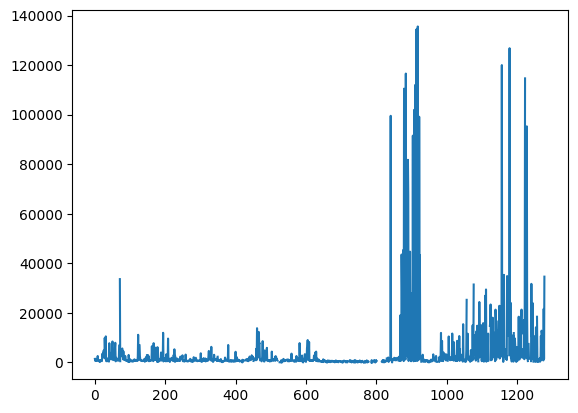

In [ ]:
channel_videos['transcript'].str.len().plot()

The longest string

In [ ]:
channel_videos['transcript'].str.len().max()

135578.0

In [ ]:
channel_videos.loc[918, 'transcript']

'(Music)  >> Delegates please welcome \nWendy Nichols and the pat form  party., if\n(Applause) clap (Applause) >> Delegates, can you take your \nseats and then we can start this afternoon\'s session. We\'ve obviously got a very \nimportant, can I ask you to  settle down and be quiet, if I \ndare say that - which I dare! I might say something different \nif it carries on, but can you  just settle down.  Be quiet. That means stopping talking for \nnow and listen to what we\'re  going to do. OOOHHH I told you I can be \ntetchy. OK, this afternoon we\'ll \ncontinue our  debate on our is international \nissues.  I have some information for you. It is clear the information \nprovided  to delegates   assisted in the \nvoting on reference back this  morning. To maximise information \navailable to  delegates for debates tomorrow, \nthe CAC  has made available the online \nform for  reference back the link can be \nfound at, I\'ll get this wrong. Https Https/Labour.org.\nUK/reference back form. 

In [ ]:
channel_videos.iloc[channel_videos['transcript'].str.len().idxmax(),:]

videoId                                               E8YlUqPBh9U
title           Labour Party Annual Conference 2019: Monday Af...
publishedAt                                  2019-09-23T17:28:00Z
channelId                                UCEBNsfXgUO74N70MJEhJQ1g
channelTitle                                         Labour Party
transcript      (Music)  >> Delegates please welcome \nWendy N...
viewCount                                                 12017.0
likeCount                                                   145.0
commentCount                                                  NaN
Name: 918, dtype: object